# Сравнение CIFARnet и ResNet18

In [1]:
import pandas as pd
from pathlib import Path

_DATA_PATH_RESNET18 = Path("../save_temp/resnet18-history.data")
_DATA_PATH_RESNET20 = Path("../save_temp/resnet20-history.data")
_DATA_PATH_RESNET110 = Path("../save_temp/resnet110-history.data")
_DATA_PATH_CIFARNET = Path("../save_temp/cifarnet-history.data")

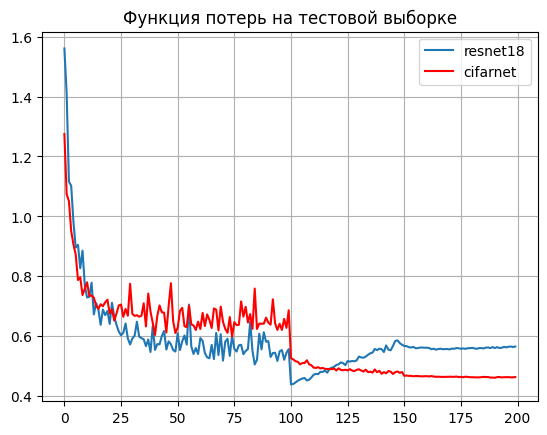

In [2]:
df1 = pd.read_csv(_DATA_PATH_RESNET18)
df2 = pd.read_csv(_DATA_PATH_CIFARNET)
ax = df1.plot(y="loss", title="Функция потерь на тестовой выборке", label="resnet18")
_ = df2.plot(ax=ax, y="loss", color="r", label="cifarnet", grid="on")

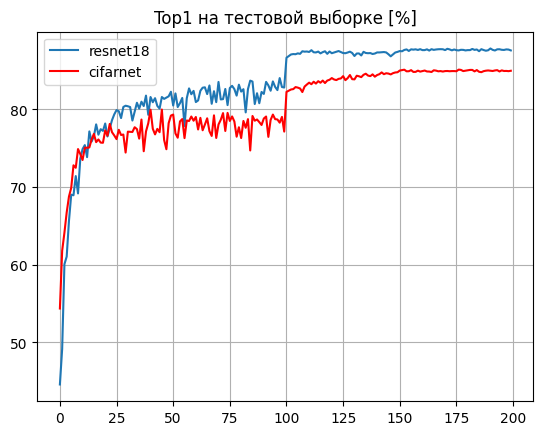

In [3]:
ax = df1.plot(y="top1", title="Top1 на тестовой выборке [%]", label="resnet18")
_ = df2.plot(ax=ax, y="top1", color="r", label="cifarnet", grid="on")

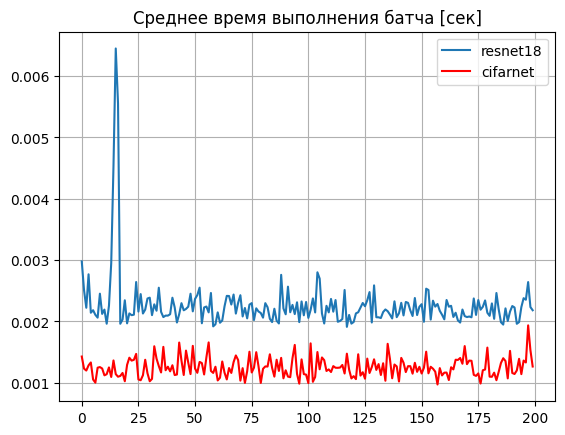

In [4]:
ax = df1.plot(y="batch_time", title="Среднее время выполнения батча [сек]", label="resnet18")
_ = df2.plot(ax=ax, y="batch_time", color="r", label="cifarnet", grid="on")

## Выводы 
* ResNet18 дает чуть выше точность на тестовой выборке
* CIFARnet определенно лучше, так как содержит меньше весов и выполняется быстрее

# Сравнение ResNet18 и ResNet20

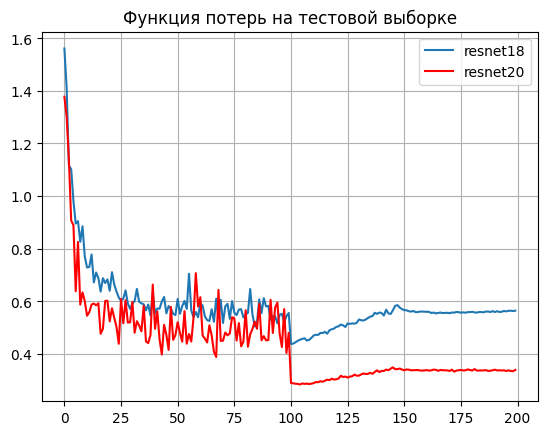

In [5]:
df1 = pd.read_csv(_DATA_PATH_RESNET18)
df2 = pd.read_csv(_DATA_PATH_RESNET20)
ax = df1.plot(y="loss", title="Функция потерь на тестовой выборке", label="resnet18")
_ = df2.plot(ax=ax, y="loss", color="r", label="resnet20", grid="on")

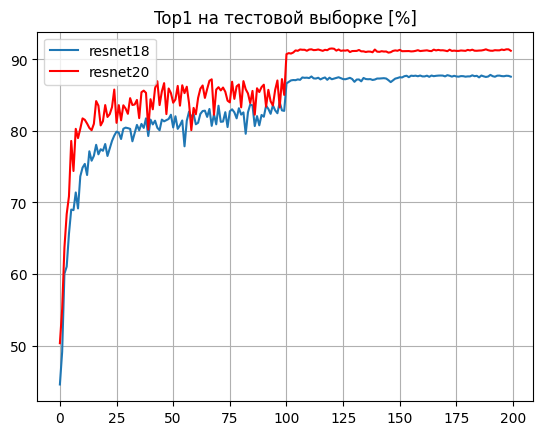

In [6]:
ax = df1.plot(y="top1", title="Top1 на тестовой выборке [%]", label="resnet18")
_ = df2.plot(ax=ax, y="top1", color="r", label="resnet20", grid="on")

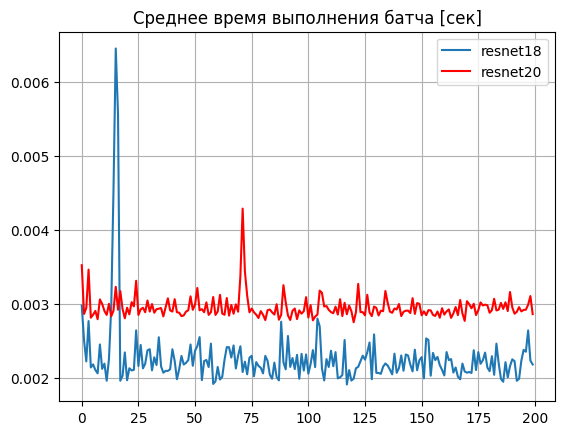

In [7]:
ax = df1.plot(y="batch_time", title="Среднее время выполнения батча [сек]", label="resnet18")
_ = df2.plot(ax=ax, y="batch_time", color="r", label="resnet20", grid="on")

## Выводы
Выглядит так, что с ResNet20 можно получить более высокую точность, чем с ResNet18

# ResNet110

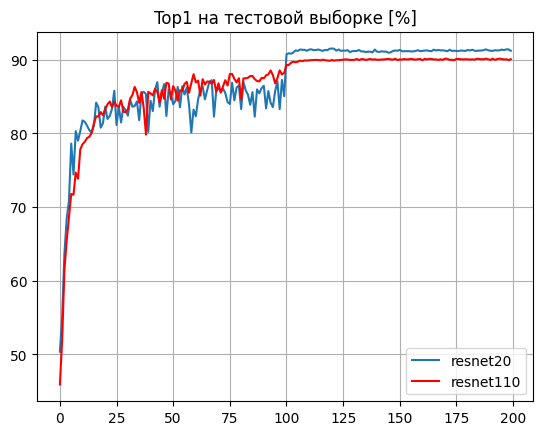

In [8]:
df1 = pd.read_csv(_DATA_PATH_RESNET20)
df2 = pd.read_csv(_DATA_PATH_RESNET110)
ax = df1.plot(y="top1", title="Top1 на тестовой выборке [%]", label="resnet20", grid="on")
_ = df2.plot(ax=ax, y="top1", color="r", label="resnet110", grid="on")

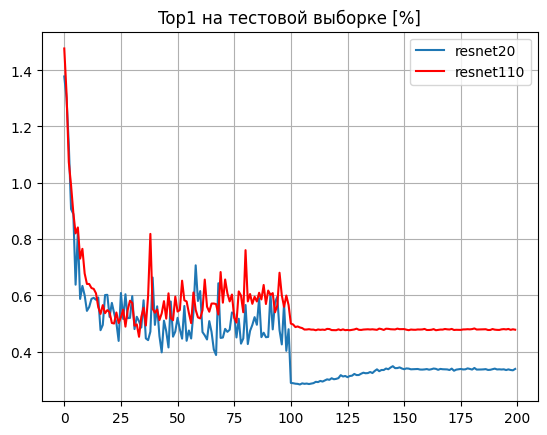

In [9]:
ax = df1.plot(y="loss", title="Top1 на тестовой выборке [%]", label="resnet20")
_ = df2.plot(ax=ax, y="loss", color="r", label="resnet110", grid="on")

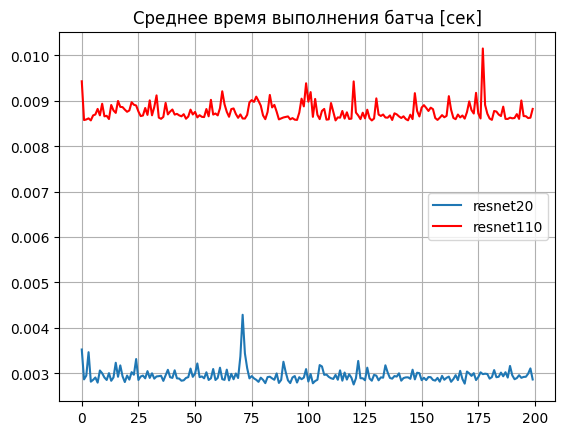

In [10]:
ax = df1.plot(y="batch_time", title="Среднее время выполнения батча [сек]", label="resnet20")
_ = df2.plot(ax=ax, y="batch_time", color="r", label="resnet110", grid="on")

## Выводы
* 110 получился с чуть меньшей точностью, чем 20
* 110 работает в три раза дольше, чем 20
* С отключенной батч-нормализацией не обучается даже ResNet20: функция потерь превращается в нечисловое значение (с причиной разбираться не стал) 

## Тест Dropout2D

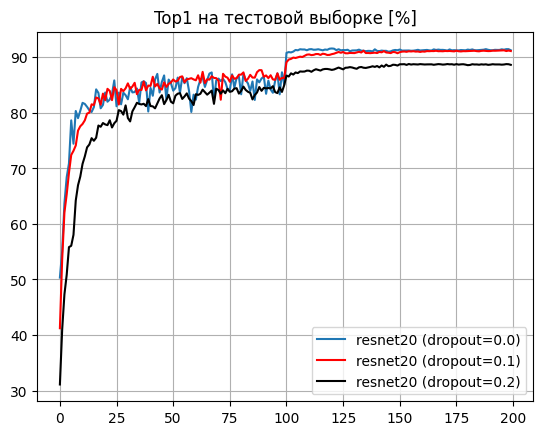

In [11]:
_DATA_PATH_RESNET20_DROPOUT_1 = Path("../save_temp/dropout_prob_01/resnet20-history.data")
_DATA_PATH_RESNET20_DROPOUT_2 = Path("../save_temp/dropout_prob_02/resnet20-history.data")
df2 = pd.read_csv(_DATA_PATH_RESNET20_DROPOUT_1)
df3 = pd.read_csv(_DATA_PATH_RESNET20_DROPOUT_2)
ax = df1.plot(y="top1", title="Top1 на тестовой выборке [%]", label="resnet20 (dropout=0.0)", grid="on")
_ = df2.plot(ax=ax, y="top1", color="r", label="resnet20 (dropout=0.1)", grid="on")
_ = df3.plot(ax=ax, y="top1", color="k", label="resnet20 (dropout=0.2)", grid="on")

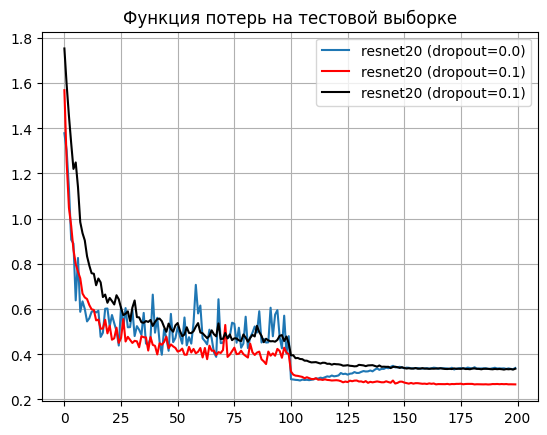

In [12]:
ax = df1.plot(y="loss", title="Функция потерь на тестовой выборке", label="resnet20 (dropout=0.0)")
_ = df2.plot(ax=ax, y="loss", color="r", label="resnet20 (dropout=0.1)", grid="on")
_ = df3.plot(ax=ax, y="loss", color="k", label="resnet20 (dropout=0.1)", grid="on")

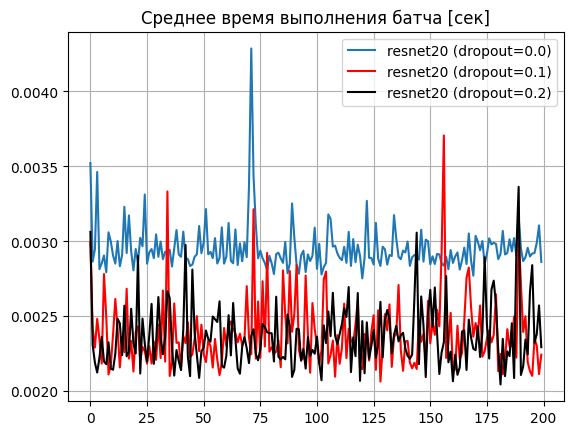

In [13]:
ax = df1.plot(y="batch_time", title="Среднее время выполнения батча [сек]", label="resnet20 (dropout=0.0)")
_ = df2.plot(ax=ax, y="batch_time", color="r", label="resnet20 (dropout=0.1)", grid="on")
_ = df3.plot(ax=ax, y="batch_time", color="k", label="resnet20 (dropout=0.2)", grid="on")

## Выводы
* Dropout убирает эффект переобучения
* Небольшой Dropout уменьшает функцию потерь
* С Dropout'ом сетка обучается медленней

# L2-регуляризация

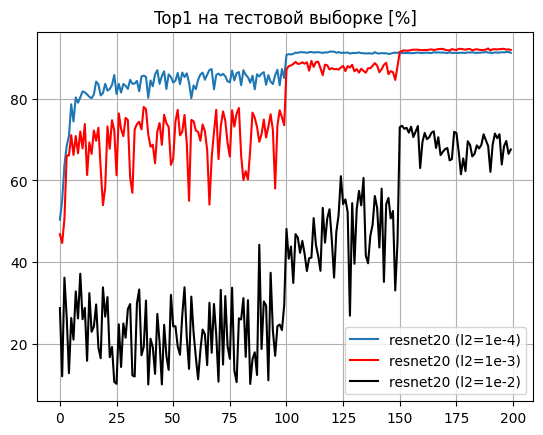

In [14]:
_DATA_PATH_RESNET20_L2_1 = Path("../save_temp/l2=0.001/resnet20-history.data")
_DATA_PATH_RESNET20_L2_2 = Path("../save_temp/l2=0.01/resnet20-history.data")

df2 = pd.read_csv(_DATA_PATH_RESNET20_L2_1)
df3 = pd.read_csv(_DATA_PATH_RESNET20_L2_2)

ax = df1.plot(y="top1", title="Top1 на тестовой выборке [%]", label="resnet20 (l2=1e-4)", grid="on")
_ = df2.plot(ax=ax, y="top1", color="r", label="resnet20 (l2=1e-3)", grid="on")
_ = df3.plot(ax=ax, y="top1", color="k", label="resnet20 (l2=1e-2)", grid="on")

## Вывод
* Небольшая регуляризация увеличивает точность
* Слишком большая регуляризация не дает модели обучаться